Skipping non-image file: images\NationalNames.csv, Error: cannot identify image file 'C:\\Users\\Systema\\LAB4\\Images\\NationalNames.csv'
Skipping non-image file: images\russia_losses_equipment.csv, Error: cannot identify image file 'C:\\Users\\Systema\\LAB4\\Images\\russia_losses_equipment.csv'
Skipping non-image file: images\text.txt, Error: cannot identify image file 'C:\\Users\\Systema\\LAB4\\Images\\text.txt'



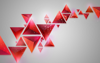
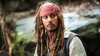
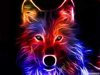
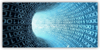
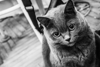
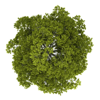
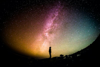
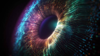
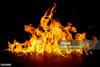
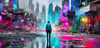
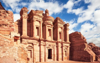
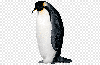
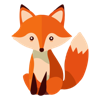
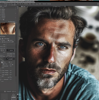
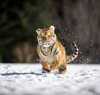

In [1]:
import os
import glob
import pandas as pd
from PIL import Image, ImageOps
from io import BytesIO
import base64

def analyze_images(folder_path):
    image_data = []
    file_paths = glob.glob(os.path.join(folder_path, "*"))

    for file_path in file_paths:
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                file_size = os.path.getsize(file_path) / (1024 * 1024)  # Розмір у мегабайтах
                width, height = img.size
                color_model = img.mode
                format_img = img.format
                channels = len(img.getbands())
                full_path = os.path.abspath(file_path)

                thumbnail = img.copy()
                thumbnail.thumbnail((100, 100))  # Мініатюра 100x100
                buffer = BytesIO()
                thumbnail.save(buffer, format="PNG")
                encoded_thumbnail = base64.b64encode(buffer.getvalue()).decode("utf-8")

                image_data.append({
                    "File Name": file_name,
                    "Color Model": color_model,
                    "Format": format_img,
                    "Channels": channels,
                    "File Size (MB)": round(file_size, 2),
                    "Width": width,
                    "Height": height,
                    "Full Path": full_path,
                    "Thumbnail": f'<img src="data:image/png;base64,{encoded_thumbnail}" width="50" height="50"/>'
                })
        except Exception as e:
            print(f"Skipping non-image file: {file_path}, Error: {e}")

    df = pd.DataFrame(image_data)
    return df

def display_html_table(df):
    html_table = df.to_html(escape=False, index=False)
    from IPython.display import HTML, display
    display(HTML(html_table))

folder = "images" 
df = analyze_images(folder)

if not df.empty:
    display_html_table(df)
else:
    print("No valid images found in the folder!")


In [2]:
import random
import os
from PIL import Image, ImageOps
from IPython.display import display

def resize_and_crop(img, size):

    img = ImageOps.fit(img, size, Image.Resampling.LANCZOS)
    return img

def apply_random_filter(img):

    filters = [
        (255, 0, 0),   
        (0, 255, 0),   
        (0, 0, 255),  
        (255, 255, 0), 
        (255, 0, 255), 
        (0, 255, 255)  
    ]
    overlay_color = random.choice(filters)
    color_layer = Image.new("RGB", img.size, overlay_color)
    img = Image.blend(img.convert("RGB"), color_layer, alpha=0.3)
    return img

def create_poster(folder_path, output_file, cols, rows, img_size=(500, 500)):

    valid_image_formats = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_image_formats]
    images = []

    for _ in range(cols * rows):
        try:
            file_path = random.choice(file_paths)
            with Image.open(file_path) as img:
                img = resize_and_crop(img, img_size)
                img = apply_random_filter(img)
                images.append(img)
        except Exception as e:
            print(f"Skipping file: {file_path}, Error: {e}")

    if len(images) < cols * rows:
        print(f"Not enough images in the folder. Found {len(images)} images.")
        return

    poster_width = cols * img_size[0]
    poster_height = rows * img_size[1]
    poster = Image.new("RGB", (poster_width, poster_height))

    for i in range(rows):
        for j in range(cols):
            img = images.pop(0)
            x_offset = j * img_size[0]
            y_offset = i * img_size[1]
            poster.paste(img, (x_offset, y_offset))

    poster.save(output_file)
    print(f"Poster saved as {output_file}")
    
    display(poster)

Poster saved as poster2.png


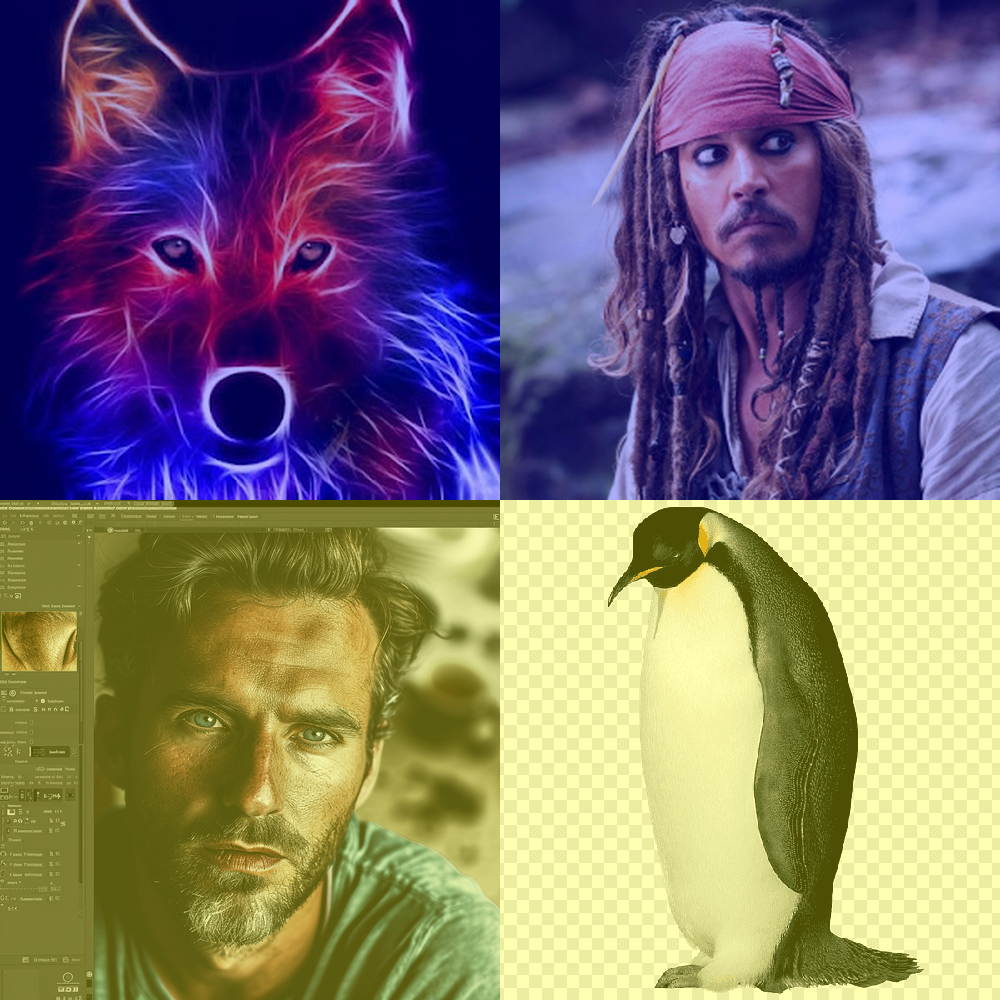

In [3]:
folder = "images"
create_poster(folder, "poster2.png", cols=2, rows=2) 

Poster saved as poster1.jpg


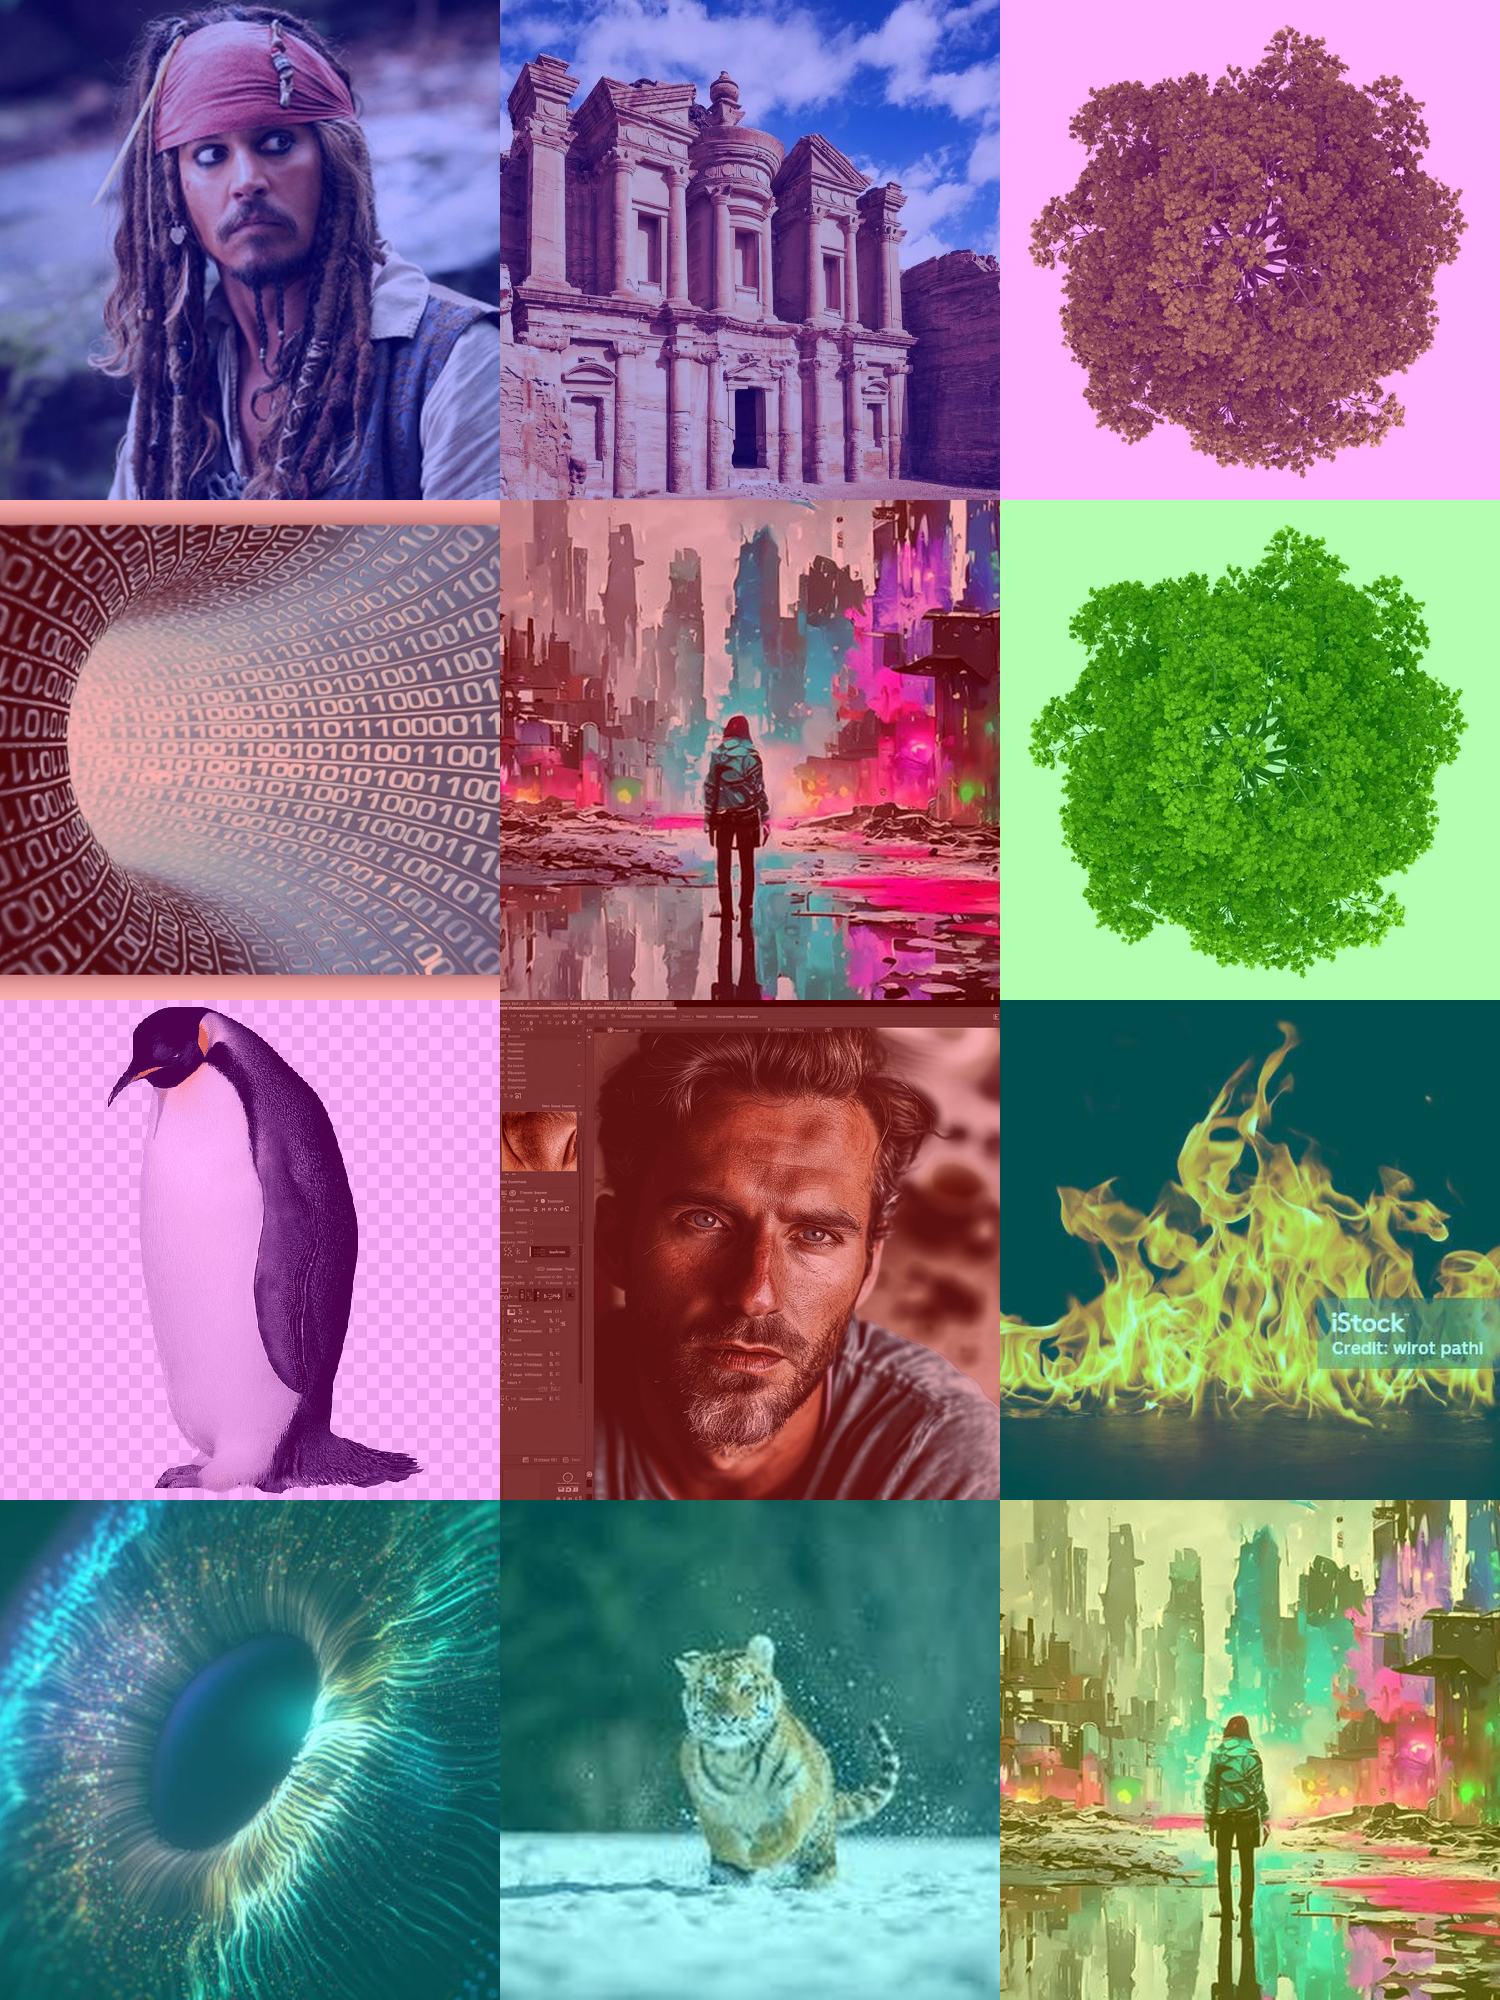

In [4]:
folder = "images"
create_poster(folder, "poster1.jpg", cols=3, rows=4) 